# **LGM INTERNSHIP DATA SCIENCE ADVANCED LEVEL TASK-1**



# **Handwritten** **Digit** **Classification**
**BY** **ABINANDAN**.**V**


Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners. Dataset can be seen on MNIST

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ***Checking for GPU***

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

# ***LOADING*** ***DATASET***

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
x_train = tf.expand_dims(X_train, axis=-1)


In [ ]:
x_test = tf.expand_dims(X_test,axis =-1)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

# ***PLOTTING AND SCALING***

In [ ]:
import matplotlib.pyplot as plt
def show(x,index):
    plt.figure(figsize=(5,2))
    plt.imshow(x[index],cmap = plt.cm.binary)

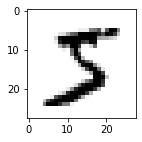

In [ ]:
show(X_train,0)

In [ ]:
X_train = X_train/255
X_test = X_test/255
x_train = X_train/255

In [ ]:
x_train[:5]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

# ***CNN*** ***MODEL*** ***CREATION***

In [ ]:
cnn1 = tf.keras.Sequential([  layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
                             layers.MaxPool2D((2,2)),
                             
                             layers.Flatten(input_shape = (28,28)),
                             layers.Dense(4000,activation = 'relu'),
                             layers.Dense(10,activation = 'softmax')])

In [ ]:
cnn1.compile(loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'],optimizer = 'adam')

In [ ]:
history = cnn1.fit(x_train,y_train,epochs = 5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0084 - accuracy: 0.9975 - val_loss: 0.0787 - val_accuracy: 0.9838
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0074 - accuracy: 0.9977 - val_loss: 0.0741 - val_accuracy: 0.9851
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0661 - val_accuracy: 0.9866
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0807 - val_accuracy: 0.9865
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0066 - accuracy: 0.9982 - val_loss: 0.0887 - val_accuracy: 0.9844


# ***METRICS*** ***CALCULATION*** ***AND*** ***PLOTTING***

In [ ]:
acc = history.history['accuracy']

In [ ]:
val_acc = history.history['val_accuracy']
val_acc

[0.9837999939918518,
 0.9850999712944031,
 0.9865999817848206,
 0.9865000247955322,
 0.9843999743461609]

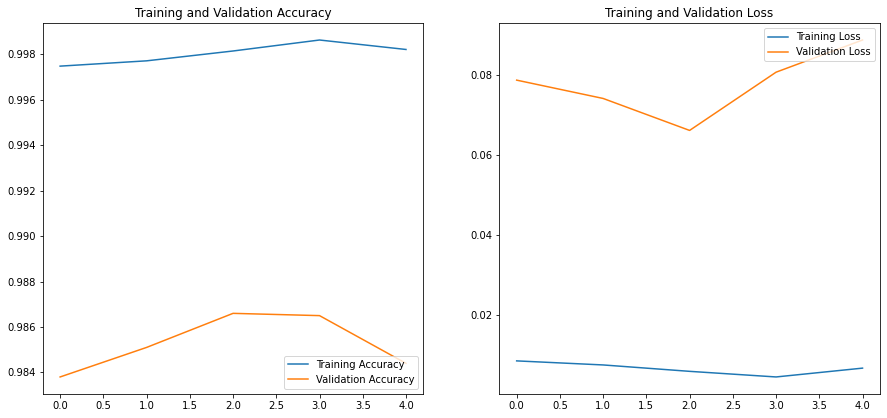

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')

plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
y_pred = cnn1.predict(x_test)

In [ ]:
y_pred

array([[1.2782039e-24, 4.3799045e-17, 3.4568417e-17, ..., 1.0000000e+00,
        4.1733692e-20, 1.2861693e-20],
       [2.3834242e-22, 2.2568965e-17, 1.0000000e+00, ..., 1.4485986e-25,
        8.6291858e-25, 1.0639943e-24],
       [4.2544621e-21, 1.0000000e+00, 4.1255349e-20, ..., 4.3991297e-16,
        7.5153024e-22, 1.1945401e-22],
       ...,
       [3.1215904e-25, 2.4030347e-14, 9.8075952e-23, ..., 6.1783108e-15,
        5.4908260e-16, 3.0962234e-17],
       [2.0756355e-21, 1.4777589e-21, 3.3140321e-23, ..., 3.3080091e-22,
        7.0082189e-13, 6.2518657e-19],
       [4.7148961e-17, 7.6809801e-20, 3.7240467e-24, ..., 2.0039811e-25,
        1.9992217e-20, 3.3407780e-22]], dtype=float32)

In [ ]:
y_pred_list = [np.argmax(i) for i in y_pred]
y_pred_list[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
from sklearn import metrics
import seaborn as sns
def modelshow(x,y):
  print(metrics.classification_report(x,y))
  print(metrics.confusion_matrix(x,y))
  plt.figure(figsize=(12,10))
  sns.heatmap(metrics.confusion_matrix(x,y),annot=True,cmap='autumn',fmt='d')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       1.00      0.94      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 974    1    0    0    0    0    4    1    0    0]
 [   0 1129    3    0    0    1    1    1    0    0]
 [   4    1 1017    2    0    0    0    7    1    0]
 [   0    0    1 1001    0    5    0    1    2    0]
 [   0    1    0    0  976   

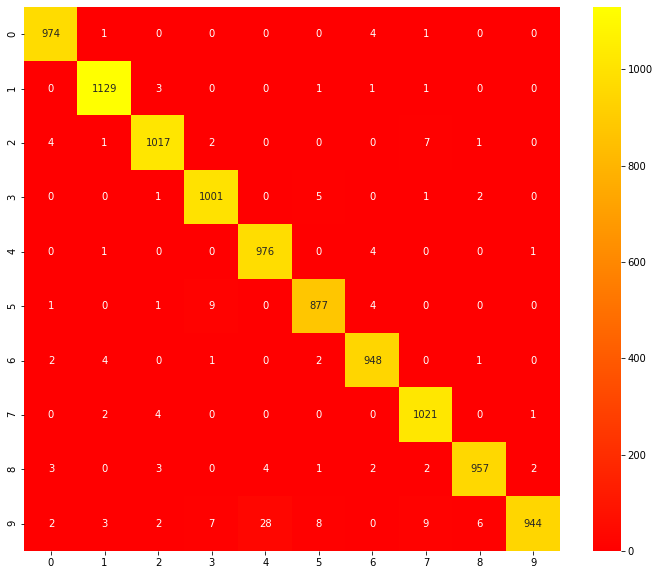

In [ ]:
modelshow(y_test,y_pred_list)

# ***CONCLUSION***

This model uses an CNN Model to predict the handwritten digits in the mnist dataset. It aslo provides an astonishing Test accuracy of 98%. I have plotted the loss and accuracy differences between test set and train set which is very small.